# Exercise 3 – Interpretation von Modellen

### a) Der Datensatz `employment_08_09.xlsx` beinhaltet die sozioökonomischen Daten der Arbeitskräfte in den USA im April 2008 und Angaben, ob sie im April 2009 weiterhin angestellt sind. Alle Befragten waren im April 2008 angestellt. Sagen Sie basierend auf den 2008er Informationen vorher, welche Arbeitskraft 2009 arbeitslos wird. Haben ältere Arbeitskräfte ein höheres Risiko für Arbeitslosigkeit während der Finanzkrise 2008-2009?

###### Einlesen des Datensatzes

In [24]:
import pandas as pd

# load dataset
data = pd.read_excel('./data/employment_08_09.xlsx')

These data file contains data on 5412 workers who were survey in the April 2008 Current Population Survey and reported that they were employed. The data file contains their employment status in April 2009, one year later, along with some additional variables.

In [94]:
data.shape

(5412, 21)

In [146]:
data.head()

,age,race,earnwke,employed,unemployed,married,union,ne_states,so_states,ce_states,...,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
0,53,1,NaN,1,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,39,1,NaN,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
2,41,1,500.0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,27,1,520.0,1,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
4,29,3,615.0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


####  Untersuchen Sie die Art der Variablen und die Verteilung der Zielvariablen.

###### Art der Variablen

- `employed`: Im Jahr 2009 noch angestellt, Integer-Indikator
- `unemployed`: Im Jahr 2009 nicht mehr angestellt, Integer-Indikator


- `age`: Alter, Integer (kontinuierlich)


- `female`: Geschlecht (weiblich=1), Integer-Indikator


- `married`: Verheiratet (ja=1), Integer-Indikator


- `race`: Rasse (weiß=1, schwarz=2, andere=3), Integer-Indikator


- `union`: Gewerkschaftsmitglied (ja=1), Integer-Indikator


- `ne_states`: Von Nordost-Staat (ja=1), Integer-Indikator
- `so_states`: Von Südstaat (ja=1), Integer-Indikator
- `ce_states`: Von zentralem Staat (ja=1), Integer-Indikator
- `we_states`: Von westlichem Staat (ja=1), Iteger-Indikator


- `private`: Angestellt in privatem Betrieb (ja=1), Integer-Indikator
- `government`: Angestellt von der Regierung, (ja=1), Integer-Indikator
- `self`: Selbstständig (ja=1)


- `educ_lths`: Höschster Abschluss niedriger als High-School (ja=1), Integer-Indikator
- `educ_hs`: Höchster Abschluss ist High-School (ja=1), Integer-Indikator
- `educ_somecol`: Höchster Abschluss ist College (ja=1), Integer-Indikator
- `educ_aa`: Höchster Abschluss ist AA (ja=1), Integer-Indikator
- `educ_ba`: Höchster Abschluss ist BA oder BS (ja=1), Integer-Indikator
- `educ_adv`: Höchster Abschluss fortgeschritten (ja=1), Integer-Indikator


- `earnwke`: Durschnittliches wöchentliches Einkommen, Float (kontinuierlich)

**Erkenntnisse**:
- Manche Variablen sind numerisch-kontinuierlich (Alter, Einkommen)
- Manche Kategorie-Variablen sind one-hot enkodiert (Angestellt 2009, Staat, Angestelltenverhältnis, Abschluss)
- Andere Kategorie-Variablen sind Integer-enkodiert (Geschlecht, Verheiratet, Rasse, Gewerkschaftsmitglied)

--> Letztere sollten auch one-hot enkodiert werden

**Überprüfen, ob Staaten one-hot enkodiert sind:**

In [138]:
# Number of objects where at least one state field is == 1 (should be 5412)
(data[data['ne_states']==1].count() + data[data['so_states']==1].count() + data[data['ce_states']==1].count() + data[data['we_states']==1].count())[0]

5412

In [139]:
# Number of objects where every state field is == 0 (should be 0)
data[(data['ne_states']==0) & (data['so_states']==0) & (data['ce_states']==0) & (data['we_states']==0)].count()[0]

0

###### Verteilung der Zielvariable

In [183]:
# Number of objects with contradiction (employed and unemployed)
data[(data['employed']==1) & (data['unemployed']==1)].count()[0]

0

In [184]:
# Number of objects with no information (not employed and not unemployed)
data[(data['employed']==0) & (data['unemployed']==0)].count()[0]

435

In [185]:
# Preparing values for the barplot
employed = data[data['employed']==1].count()[0]
unemployed = data[data['unemployed']==1].count()[0]
no_information = data[(data['employed']==0) & (data['unemployed']==0)].count()[0]

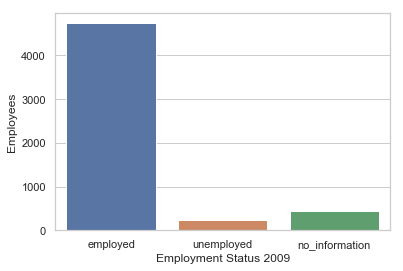

In [192]:
# Instanciating a new dataframe to have a nice barplot with descriptions
plot_data = pd.DataFrame({'Employment Status 2009': ['employed', 'unemployed', 'no_information'], 'Employees': [employed, unemployed, no_information]})
# Drawing the barplot
ax = sns.barplot(x='Employment Status 2009', y='Employees', data=plot_data, ci=None)

# Alternative (without descriptions)
# ax = sns.barplot(data=[[employed], [unemployed], [no_information]], ci=None)

**Erkenntnis:**

Datenobjekte ohne Beschäftigungsinformation 2009 können zum Trainieren / Testen nicht verwendet werden und sollten deshalb bei der Datenvorverarbeitung entfernt werden.

###### Datenvorverarbeitung

1. Entfernen der Datenobjekte ohne Beschäftigungsinformation 2009

In [196]:
# Set rows with no information about Employment Status 2009 no NaN
data_cleaned = data.where(cond=(data['employed']==1) | (data['unemployed']==1))

# Removing those rows from the dataframe
data_cleaned = data_cleaned.dropna(how='all')

In [198]:
# New size of the dataframe
data_cleaned.shape

(4977, 21)

2. Trennen der unabhängigen Daten (`X`) von den abhängigen Daten (Zielvariable `y`)

In [219]:
X_df = data_cleaned.drop(['employed', 'unemployed'], axis=1)
X = X_df.values

In [222]:
X_df.columns

Index(['age', 'race', 'earnwke', 'married', 'union', 'ne_states', 'so_states',
       'ce_states', 'we_states', 'government', 'private', 'self', 'educ_lths',
       'educ_hs', 'educ_somecol', 'educ_aa', 'educ_bac', 'educ_adv', 'female'],
      dtype='object')

In [224]:
y_df = data_cleaned[['employed', 'unemployed']]
y = y_df.values

3. One-Hot Enkodierung

In [200]:
# Import OneHotEncoder from sklearn
from sklearn.preprocessing import OneHotEncoder

In [ ]:
onehotencoder = OneHotEncoder(categorical_features = [0])